In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read the dataset from CSV
data = pd.read_csv('kmeans - kmeans_blobs.csv')

# Normalize the data
data_normalized = (data - data.mean()) / data.std()


In [23]:
# Step 2: Implement K-means algorithm
def k_means(data, k, max_iter=100):
    # Randomly initialize centroids
    centroids = data.sample(k).values
    
    for _ in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((data.values - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

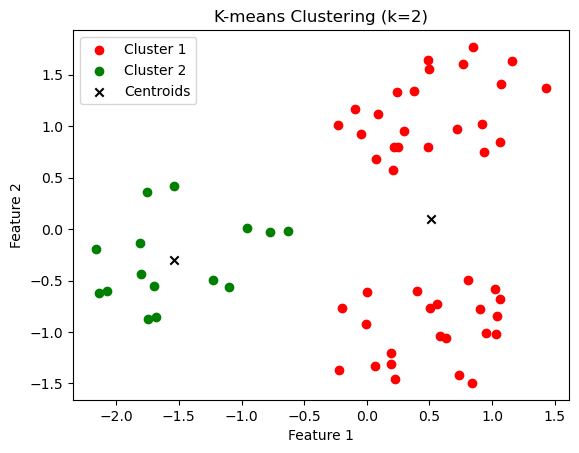

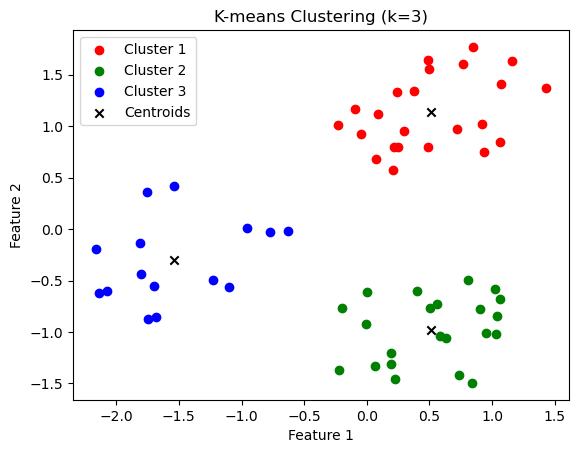

In [24]:
# Step 3: Plot the clusters for k=2 and k=3
def plot_clusters(data, labels, centroids, k):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i in range(k):
        plt.scatter(data.values[labels == i, 0], data.values[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering (k={k})')
    plt.legend()
    plt.show()

# Apply K-means for k=2
k = 2
labels, centroids = k_means(data_normalized, k)
plot_clusters(data_normalized, labels, centroids, k)

# Apply K-means for k=3
k = 3
labels, centroids = k_means(data_normalized, k)
plot_clusters(data_normalized, labels, centroids, k)